In [1]:
# Imports
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

In [ ]:
with open("data/H2O_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [3]:
num_qubits = hamiltonian.num_qubits
res_normal = {"times":[], "iters": [], "energies": []}
res_all_layers = {"times":[], "iters": [], "energies": []}
res_all_layers_rev = {"times":[], "iters": [], "energies": []}
res_some_layers = {"times":[], "iters": [], "energies": []}
res_some_layers_rev = {"times":[], "iters": [], "energies": []}
res_adding_layers = {"times":[], "iters": [], "energies": []}
res_adding_layers_rev = {"times":[], "iters": [], "energies": []}
for num_layers in range(1,11):
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    res_normal["times"].append(t1-t0)
    res_normal["iters"].append(optimization_normal["iters"])
    res_normal["energies"].append(optimization_normal["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers)
    t1 = time.time()
    res_all_layers["times"].append(t1-t0)
    res_all_layers["iters"].append(optimization_all_layers["iters"])
    res_all_layers["energies"].append(optimization_all_layers["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers, "backward")
    t1 = time.time()
    res_all_layers_rev["times"].append(t1-t0)
    res_all_layers_rev["iters"].append(optimization_all_layers_rev["iters"])
    res_all_layers_rev["energies"].append(optimization_all_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
    t1 = time.time()
    res_some_layers["times"].append(t1-t0)
    res_some_layers["iters"].append(optimization_some_layers["iters"])
    res_some_layers["energies"].append(optimization_some_layers["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1, "backward")
    t1 = time.time()
    res_some_layers_rev["times"].append(t1-t0)
    res_some_layers_rev["iters"].append(optimization_some_layers_rev["iters"])
    res_some_layers_rev["energies"].append(optimization_some_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers)
    t1 = time.time()
    res_adding_layers["times"].append(t1-t0)
    res_adding_layers["iters"].append(optimization_adding_layers["iters"])
    res_adding_layers["energies"].append(optimization_adding_layers["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers, direction= "backward")
    t1 = time.time()
    res_adding_layers_rev["times"].append(t1-t0)
    res_adding_layers_rev["iters"].append(optimization_adding_layers_rev["iters"])
    res_adding_layers_rev["energies"].append(optimization_adding_layers_rev["cost_history"][-1])

In [5]:
with open("data/layer/H2_res_normal.pkl", "wb") as f:
    pickle.dump(res_normal, f)
with open("data/layer/H2_res_all_layers.pkl", "wb") as f:
    pickle.dump(res_all_layers, f)
with open("data/layer/H2_res_all_layers_rev.pkl", "wb") as f:
    pickle.dump(res_all_layers_rev, f)
with open("data/layer/H2_res_some_layers.pkl", "wb") as f:
    pickle.dump(res_some_layers, f)
with open("data/layer/H2_res_some_layers_rev.pkl", "wb") as f:
    pickle.dump(res_some_layers_rev, f)
with open("data/layer/H2_res_adding_layers.pkl", "wb") as f:
    pickle.dump(res_adding_layers, f)
with open("data/layer/H2_res_adding_layers_rev.pkl", "wb") as f:
    pickle.dump(res_adding_layers_rev, f)

In [6]:
with open("data/layer/H2_res_normal.pkl", "rb") as f:
    res_normal = pickle.load(f)
with open("data/layer/H2_res_all_layers.pkl", "rb") as f:
    res_all_layers = pickle.load(f)
with open("data/layer/H2_res_all_layers_rev.pkl", "rb") as f:
    res_all_layers_rev = pickle.load(f)
with open("data/layer/H2_res_some_layers.pkl", "rb") as f:
    res_some_layers = pickle.load(f)
with open("data/layer/H2_res_some_layers_rev.pkl", "rb") as f:
    res_some_layers_rev = pickle.load(f)
with open("data/layer/H2_res_adding_layers.pkl", "rb") as f:
    res_adding_layers = pickle.load(f)
with open("data/layer/H2_res_adding_layers_rev.pkl", "rb") as f:
    res_adding_layers_rev = pickle.load(f)

[]

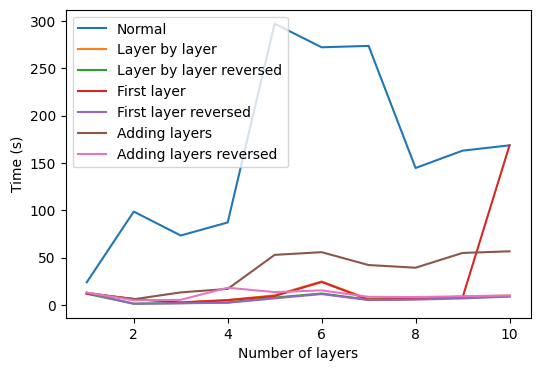

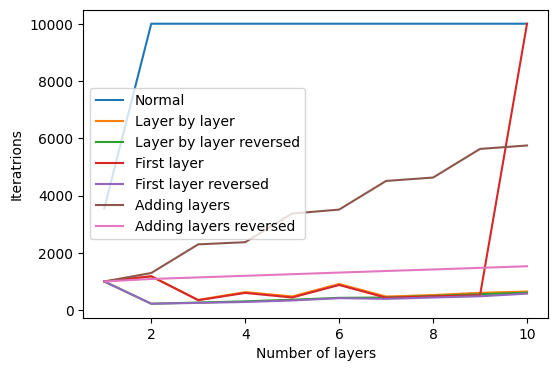

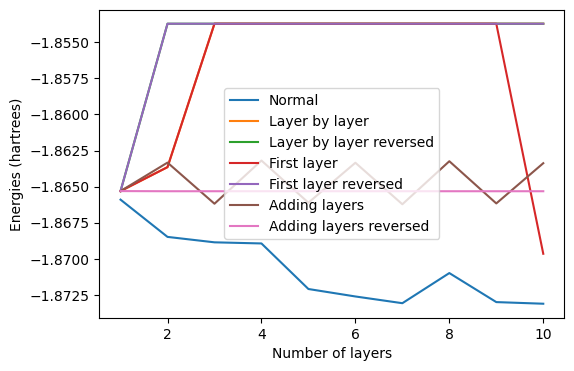

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["times"], label='Normal')
plt.plot(range(1,11), res_all_layers["times"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["times"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["times"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["times"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["times"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["times"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Time (s)')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["iters"], label='Normal')
plt.plot(range(1,11), res_all_layers["iters"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["iters"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["iters"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["iters"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["iters"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["iters"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Iteratrions')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["energies"], label='Normal')
plt.plot(range(1,11), res_all_layers["energies"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["energies"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["energies"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["energies"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["energies"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["energies"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Energies (hartrees)')
plt.legend()
plt.plot()

In [3]:
res_normal = []
res_all_layers = []
res_all_layers_rev = []
res_some_layers = []
res_some_layers_rev = []
res_adding_layers = []
res_adding_layers_rev = []
for num_qubits in range(hamiltonian.num_qubits, 11):
    hamiltonian_exp=cf.expand_observable(hamiltonian, num_qubits)
    res_normal.append({"times":[], "iters": [], "energies": []})
    res_all_layers.append({"times":[], "iters": [], "energies": []})
    res_all_layers_rev.append({"times":[], "iters": [], "energies": []})
    res_some_layers.append({"times":[], "iters": [], "energies": []})
    res_some_layers_rev.append({"times":[], "iters": [], "energies": []})
    res_adding_layers.append({"times":[], "iters": [], "energies": []})
    res_adding_layers_rev.append({"times":[], "iters": [], "energies": []})
    for num_layers in range(1,11):
        ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)

        t0 = time.time()
        optimization_normal=mit.VQE_minimization(ansatz, hamiltonian_exp)
        t1 = time.time()
        res_normal[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_normal[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_normal["iters"])
        res_normal[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_normal["cost_history"][-1])

        t0=time.time()
        optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, num_layers)
        t1 = time.time()
        res_all_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_all_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_all_layers["iters"])
        res_all_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_all_layers["cost_history"][-1])

        t0=time.time()
        optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, num_layers, "backward")
        t1 = time.time()
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_all_layers_rev["iters"])
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_all_layers_rev["cost_history"][-1])

        t0 = time.time()
        optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, 1)
        t1 = time.time()
        res_some_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_some_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_some_layers["iters"])
        res_some_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_some_layers["cost_history"][-1])

        t0 = time.time()
        optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, 1, "backward")
        t1 = time.time()
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_some_layers_rev["iters"])
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_some_layers_rev["cost_history"][-1])

        t0 = time.time()
        optimization_adding_layers=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian_exp, num_qubits, num_layers)
        t1 = time.time()
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_adding_layers["iters"])
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_adding_layers["cost_history"][-1])

        t0 = time.time()
        optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian_exp, num_qubits, num_layers, direction= "backward")
        t1 = time.time()
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_adding_layers_rev["iters"])
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_adding_layers_rev["cost_history"][-1])
res_var_qubit_layer=[res_all_layers, res_all_layers_rev, res_some_layers, res_some_layers_rev, res_adding_layers, res_adding_layers_rev]

In [11]:
with open("data/layer/res_var_qubit_layer_normal.pkl", "wb") as f:
    pickle.dump(res_normal, f)
with open("data/layer/res_var_qubit_layer.pkl", "wb") as f:
    pickle.dump(res_var_qubit_layer, f)

In [12]:
with open("data/layer/res_var_qubit_layer_normal.pkl", "rb") as f:
    res_var_qubit_layer_normal = pickle.load(f)
with open("data/layer/res_var_qubit_layer.pkl", "rb") as f:
    res_var_qubit_layer = pickle.load(f)
titles=["All layers","All layers reversed","First layer","First layer reversed","Adding layers","Adding layers reversed"]

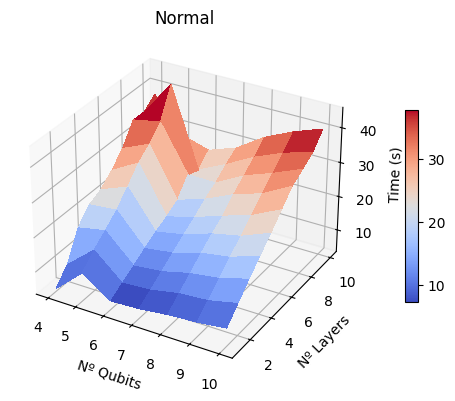

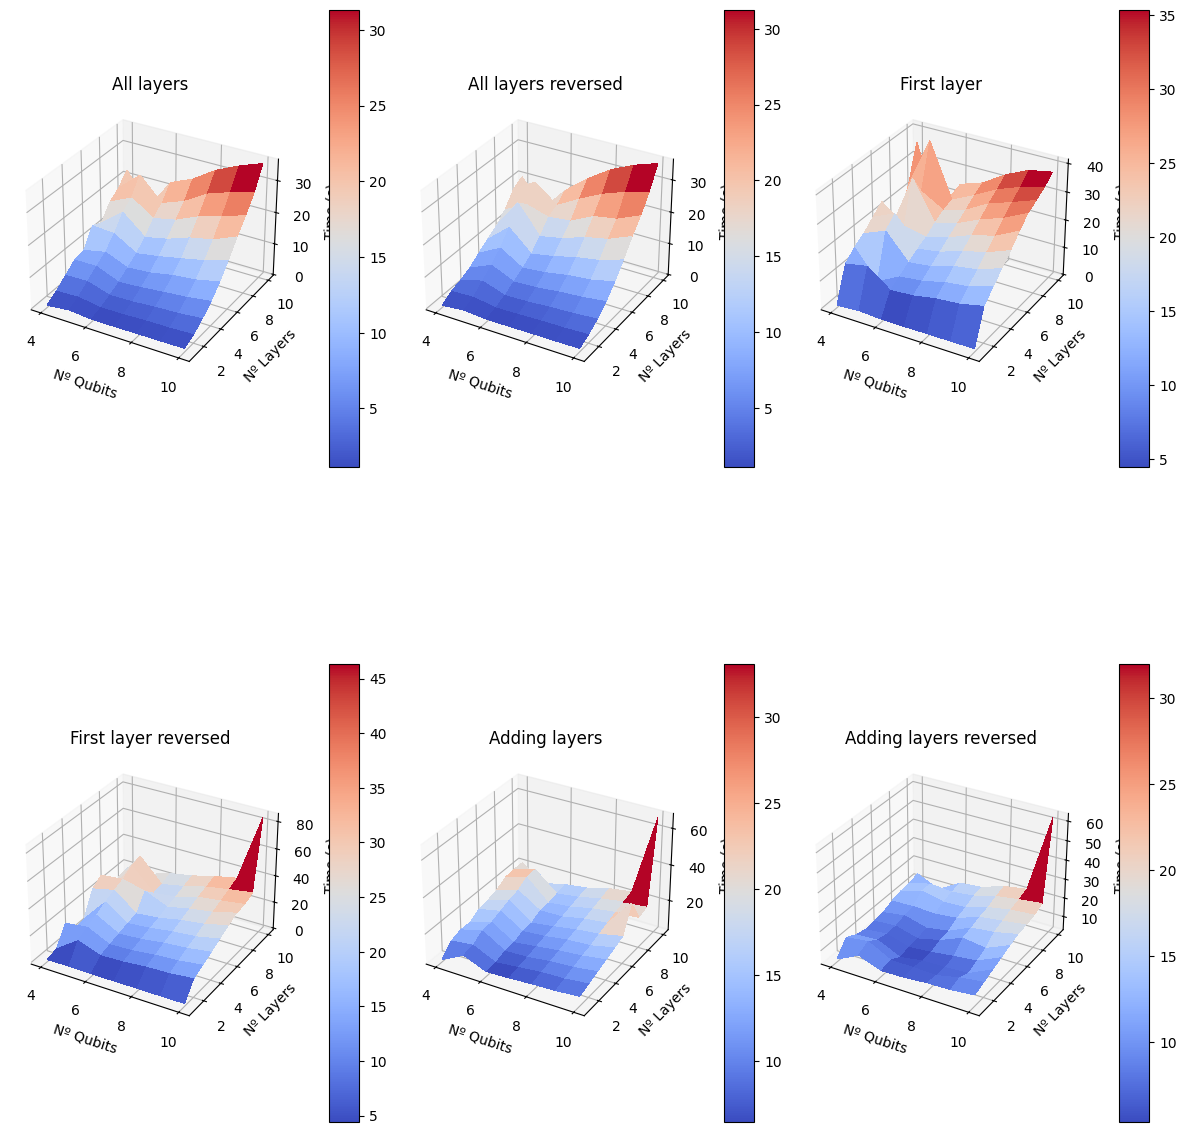

In [8]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure(figsize=(6, 5))
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["times"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title(f"Normal")
ax.set_xlabel("Nº Qubits")
ax.set_ylabel("Nº Layers")
ax.set_zlabel("Time (s)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["times"][j]
    ax = fig.add_subplot(2, 3, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title(f"{titles[k]}")
    ax.set_xlabel("Nº Qubits")
    ax.set_ylabel("Nº Layers")
    ax.set_zlabel("Time (s)")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

plt.tight_layout()
plt.show()

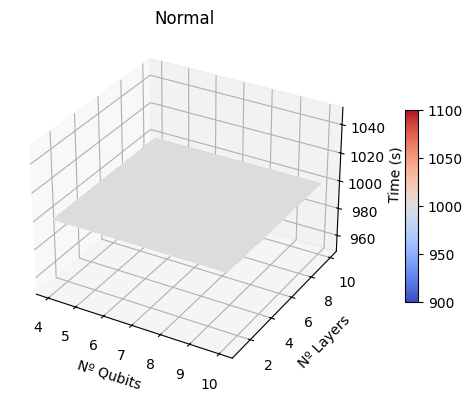

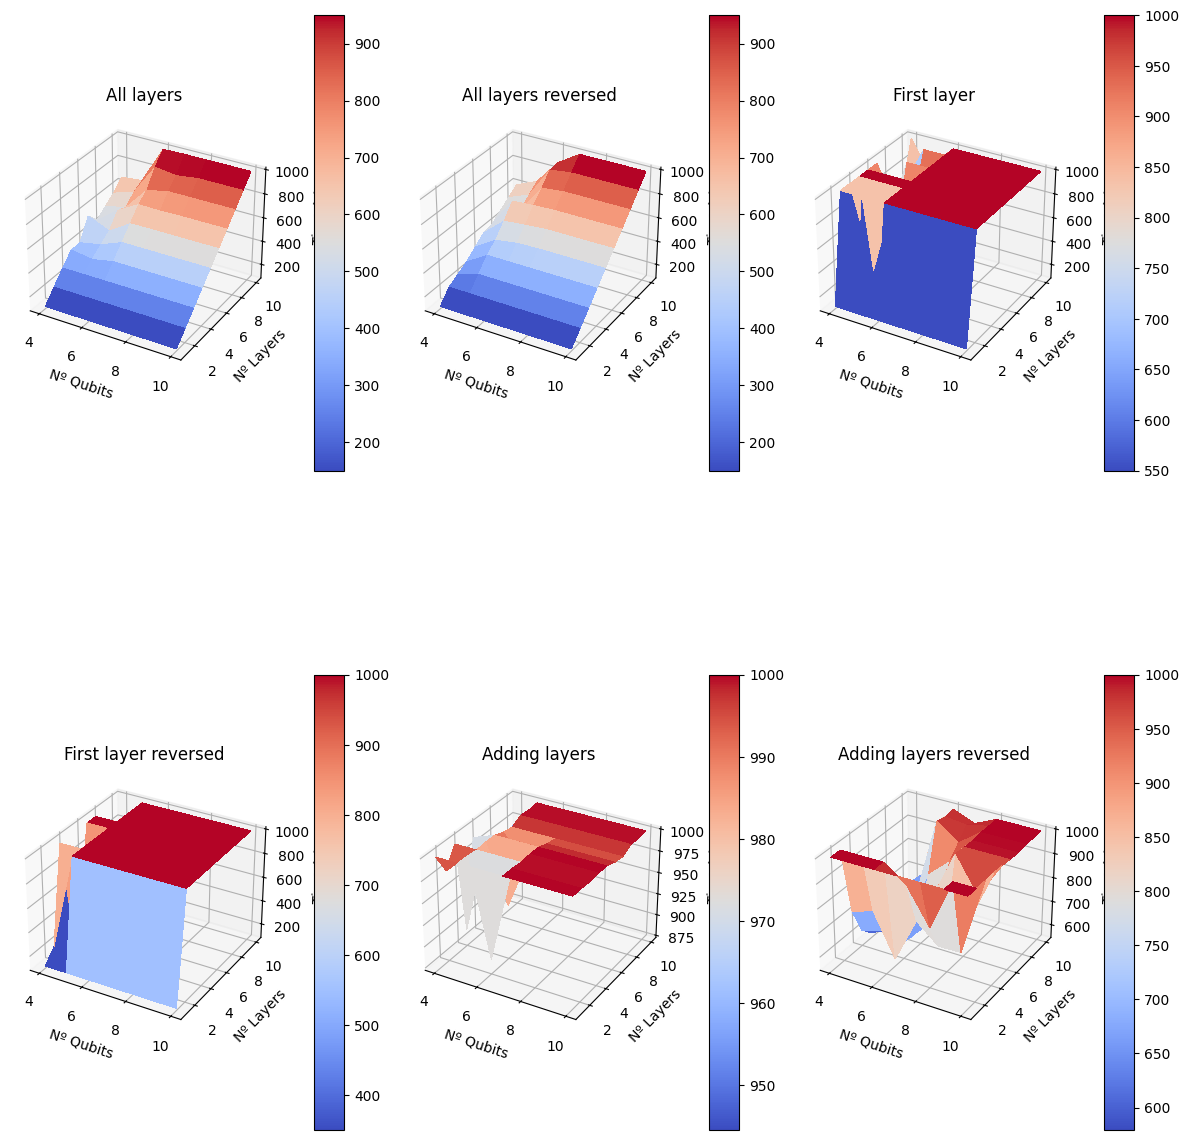

In [9]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure(figsize=(6, 5))
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["iters"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title(f"Normal")
ax.set_xlabel("Nº Qubits")
ax.set_ylabel("Nº Layers")
ax.set_zlabel("Time (s)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["iters"][j]
    ax = fig.add_subplot(2, 3, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title(f"{titles[k]}")
    ax.set_xlabel("Nº Qubits")
    ax.set_ylabel("Nº Layers")
    ax.set_zlabel("Time (s)")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

plt.tight_layout()
plt.show()

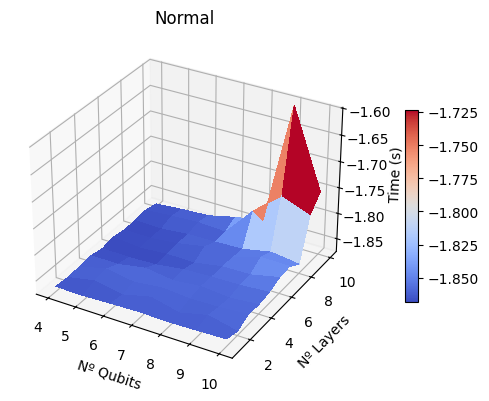

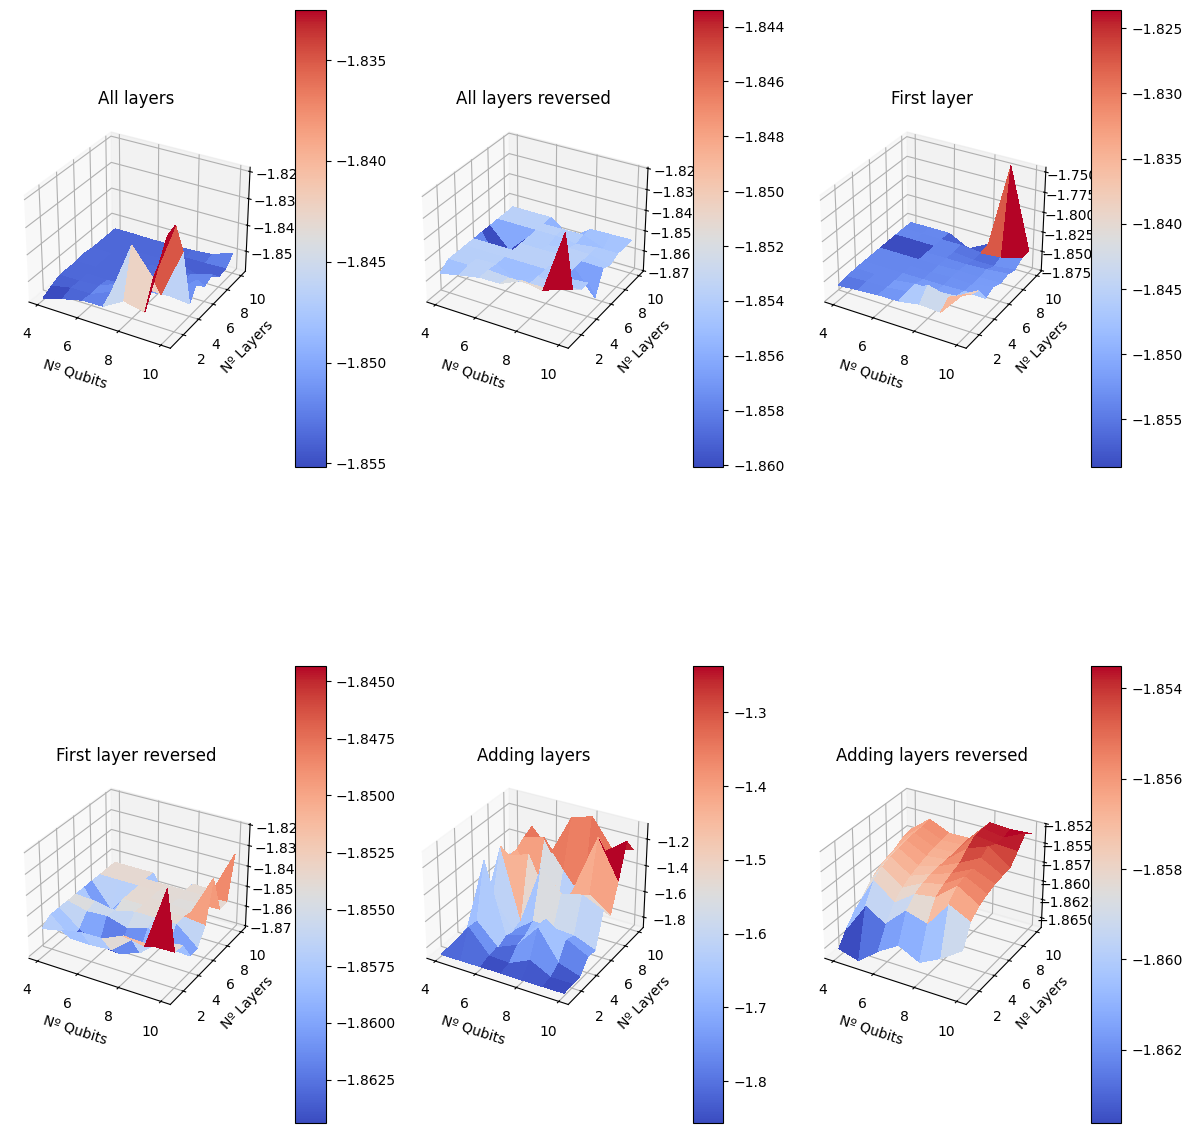

In [10]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure(figsize=(6, 5))
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["energies"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title(f"Normal")
ax.set_xlabel("Nº Qubits")
ax.set_ylabel("Nº Layers")
ax.set_zlabel("Time (s)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["energies"][j]
    ax = fig.add_subplot(2, 3, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title(f"{titles[k]}")
    ax.set_xlabel("Nº Qubits")
    ax.set_ylabel("Nº Layers")
    ax.set_zlabel("Time (s)")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15, pad=0.1)

plt.tight_layout()
plt.show()